In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from diffusers import AutoencoderDC
from datasets import load_dataset
from torchvision.transforms.v2 import ToPILImage, PILToTensor, CenterCrop

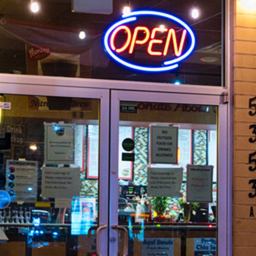

In [23]:
device="cuda:2"
dc_ae: AutoencoderDC = AutoencoderDC.from_pretrained(f"mit-han-lab/dc-ae-f32c32-in-1.0-diffusers", torch_dtype=torch.float32).to(device).eval()
ds = load_dataset("danjacobellis/LSDIR_val",split='validation')
x = PILToTensor()(CenterCrop(256)(ds[28]['image']).resize((512,512))).unsqueeze(0)
x = x.to(device)/255 - 0.5
ToPILImage()(x[0].to(torch.float)+0.5).resize((256,256))

In [35]:
latent = dc_ae.encode(x).latent
latent = latent.clamp(-127.499,127.499).round()
y = dc_ae.decode(latent).sample.clamp(-0.5,0.5)

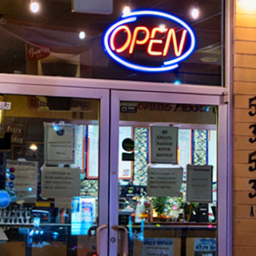

In [36]:
ToPILImage()(y[0]+0.5).resize((256,256))

In [38]:
latent.min()

tensor(-11., device='cuda:2', grad_fn=<MinBackward1>)